# Masque

### Importation des libraires nécessaires

La librairie **os** permet d'avoir accès aux informations des fichiers se trouvant sur votre ordinateur.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

On peut ensuite l'ouvrir pour vérifier qu'il contient les bonnes informations :

In [3]:
df = pd.read_csv('dataframe_plant_disease_id.csv')
df.head()

chemin  hauteur  largeur    espèce  couleur état
0  ./semis/Cleavers/348.png      450      450  Cleavers      0.0  NaN
1  ./semis/Cleavers/176.png      295      295  Cleavers      0.0  NaN
2   ./semis/Cleavers/88.png      299      299  Cleavers      0.0  NaN
3  ./semis/Cleavers/162.png      194      194  Cleavers      0.0  NaN
4  ./semis/Cleavers/189.png      438      438  Cleavers      0.0  NaN

Nous avons maintenant un super dataframe prêt à être utilisé !

/Users/clara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='espèce', ylabel='count'>

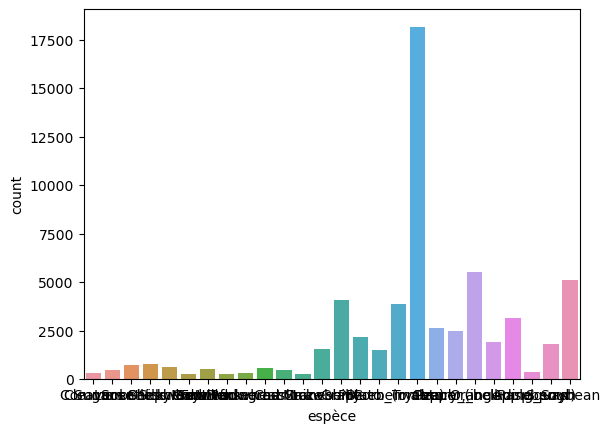

In [3]:
import seaborn as sns

sns.countplot(df["espèce"])


In [4]:
df.describe()

hauteur       largeur       couleur
count  59845.000000  59845.000000  59845.000000
mean     265.191261    265.160097      0.907444
std       94.272690     93.551838      0.289811
min       49.000000     49.000000      0.000000
25%      256.000000    256.000000      1.000000
50%      256.000000    256.000000      1.000000
75%      256.000000    256.000000      1.000000
max     3652.000000   3457.000000      1.000000

## 2. Afficher une image à partir du dataframe

On a donc à partir du dataframe accès au chemin de toutes les images du dataset dans la colonne **chemin**. 
Avec la fonction `plt.imshow`, il est possible de l'afficher.

On convertit l'image avec `plt.imread` puis on l'affiche avec `plt.imshow`

(256, 256)

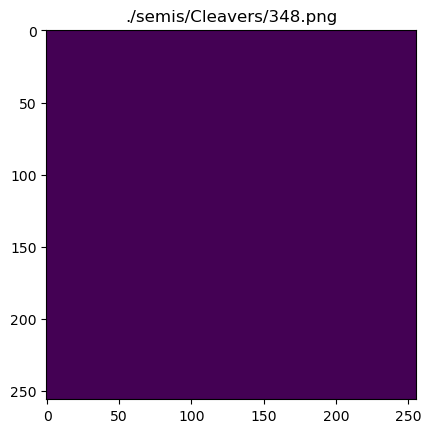

In [15]:
image_à_afficher = plt.imread('./plantdisease/Soybean___healthy/b32e4516-9cd7-4226-be52-26f413c97834___RS_HL 3512_final_masked.jpg')
if image_à_afficher.dtype == np.float32 or image_à_afficher.dtype == np.float64:
        image_à_afficher = (image_à_afficher * 255).astype(np.uint8)
plt.imshow(image_à_afficher)
plt.title(df.chemin[0]);
image_à_afficher.shape

In [6]:
image_à_afficher.shape

(295, 295, 3)

(450, 450, 3)


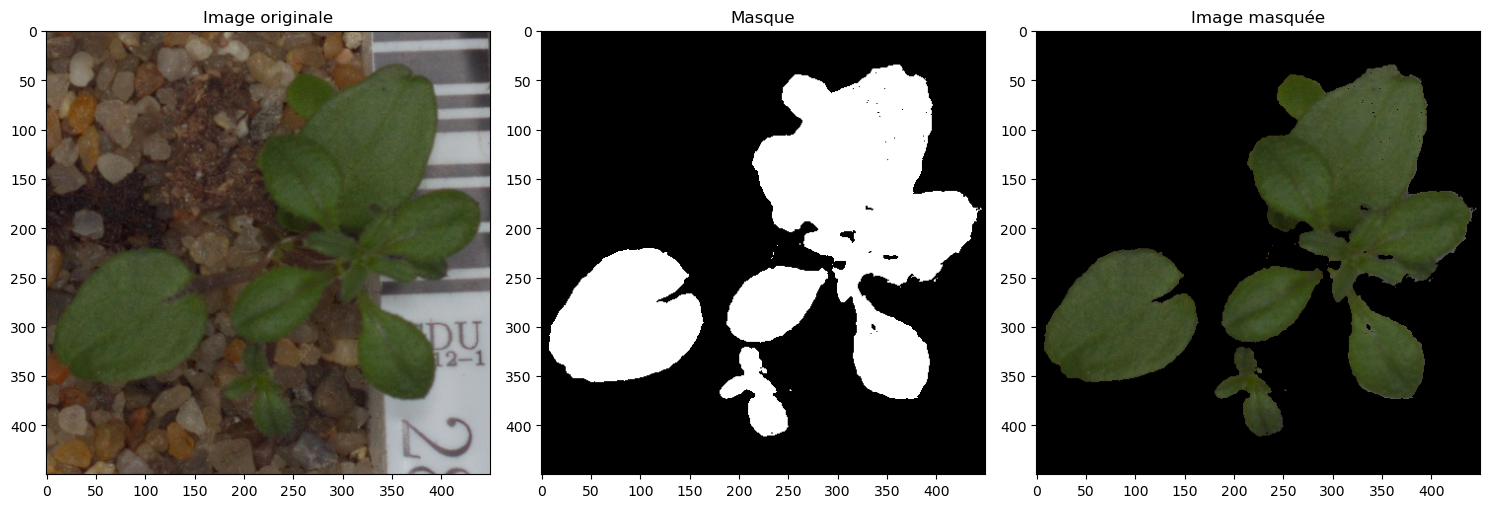

(295, 295, 3)


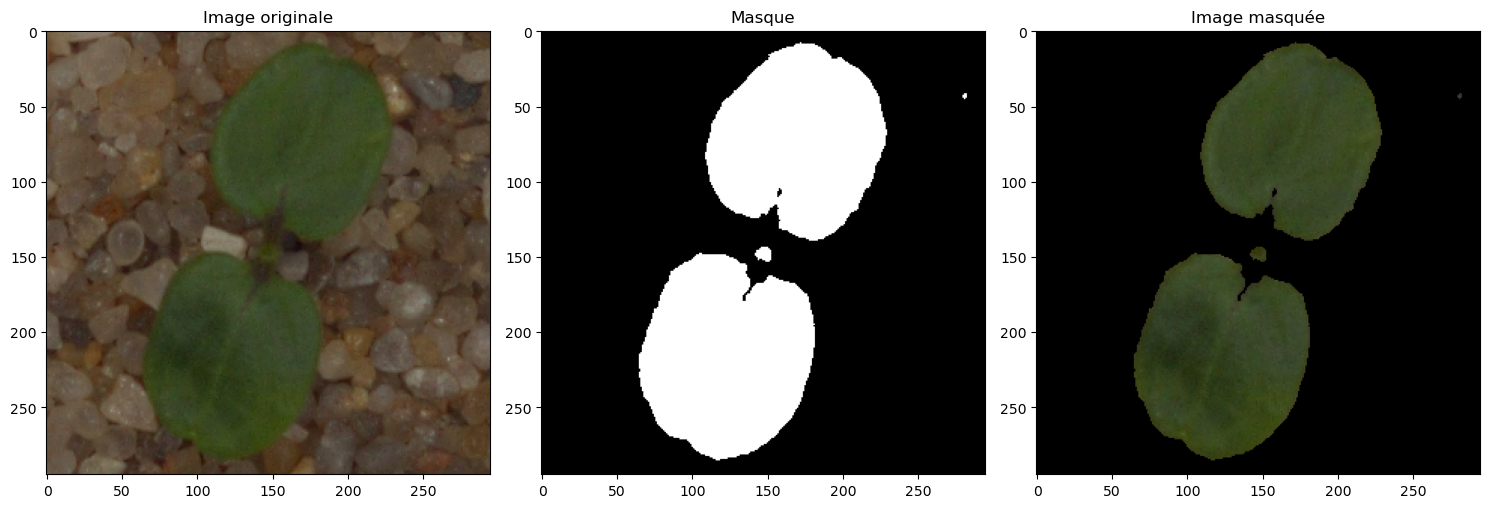

(299, 299, 3)


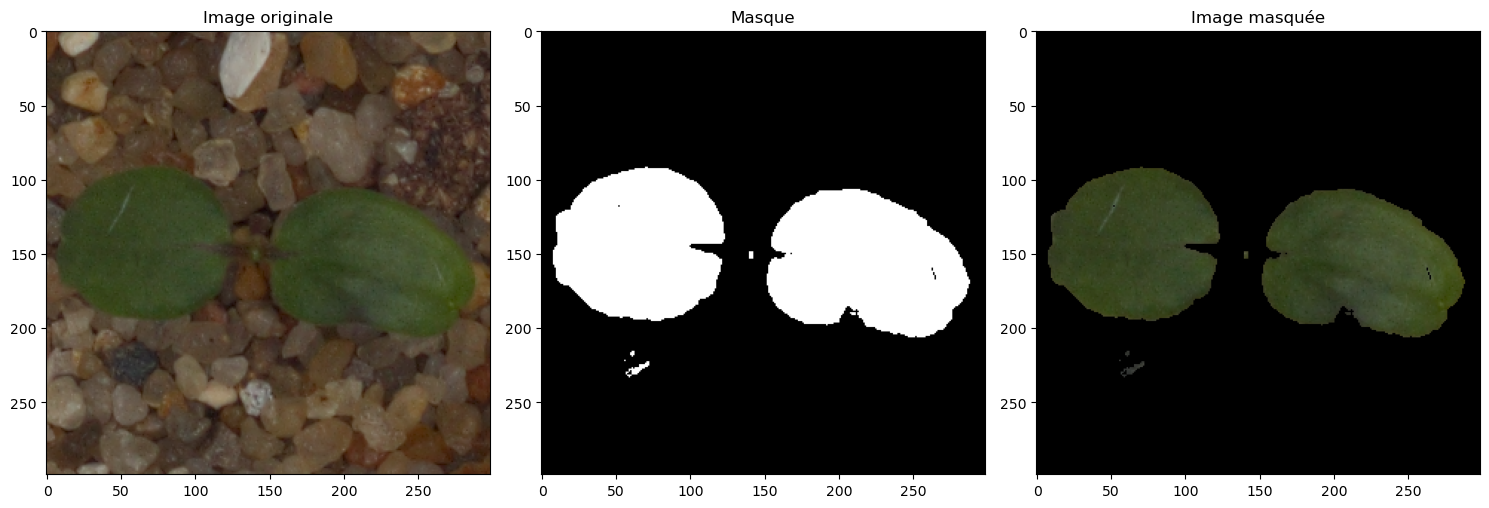

(194, 194, 3)


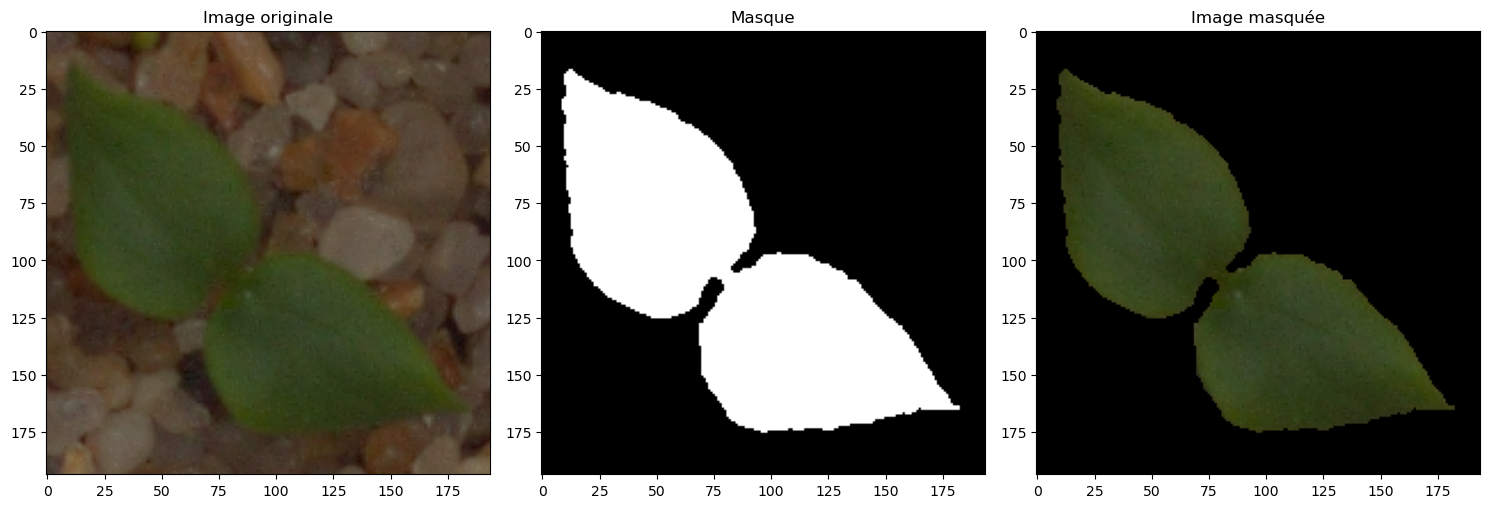

(438, 438, 3)


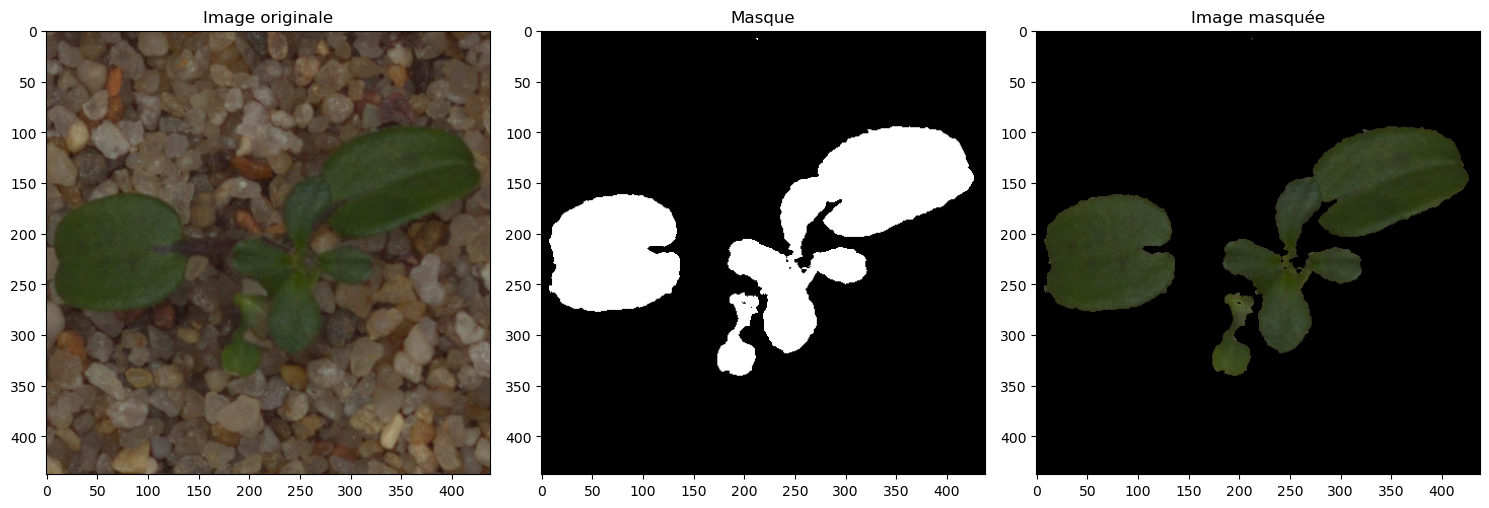

(190, 190, 3)


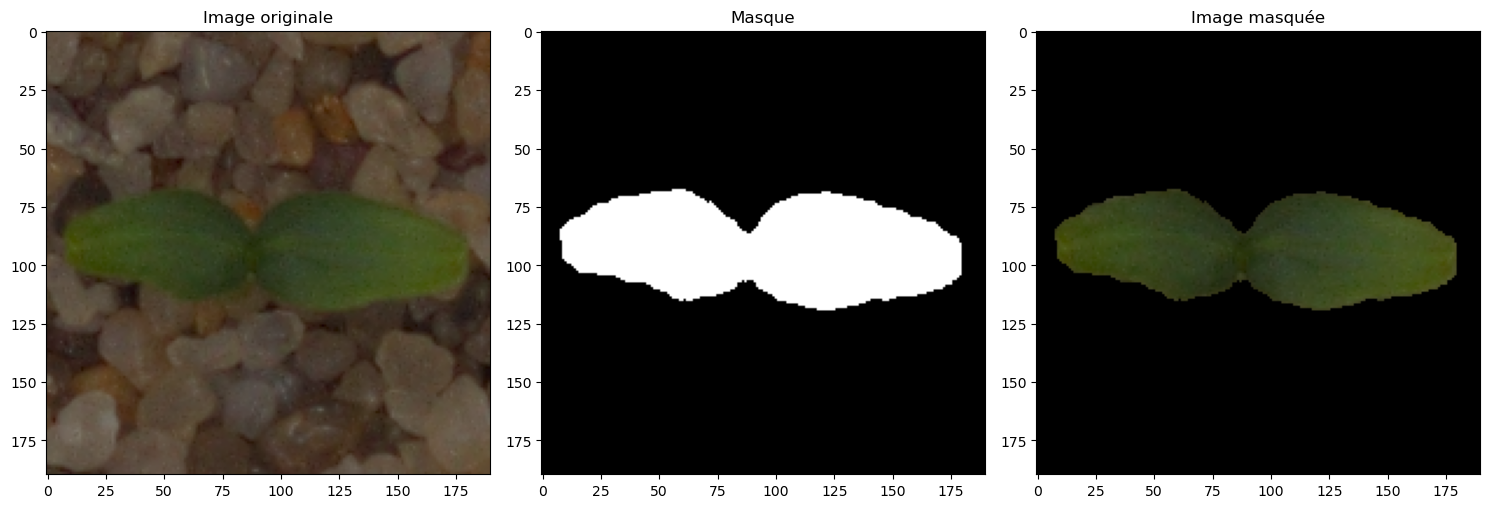

(212, 212, 3)


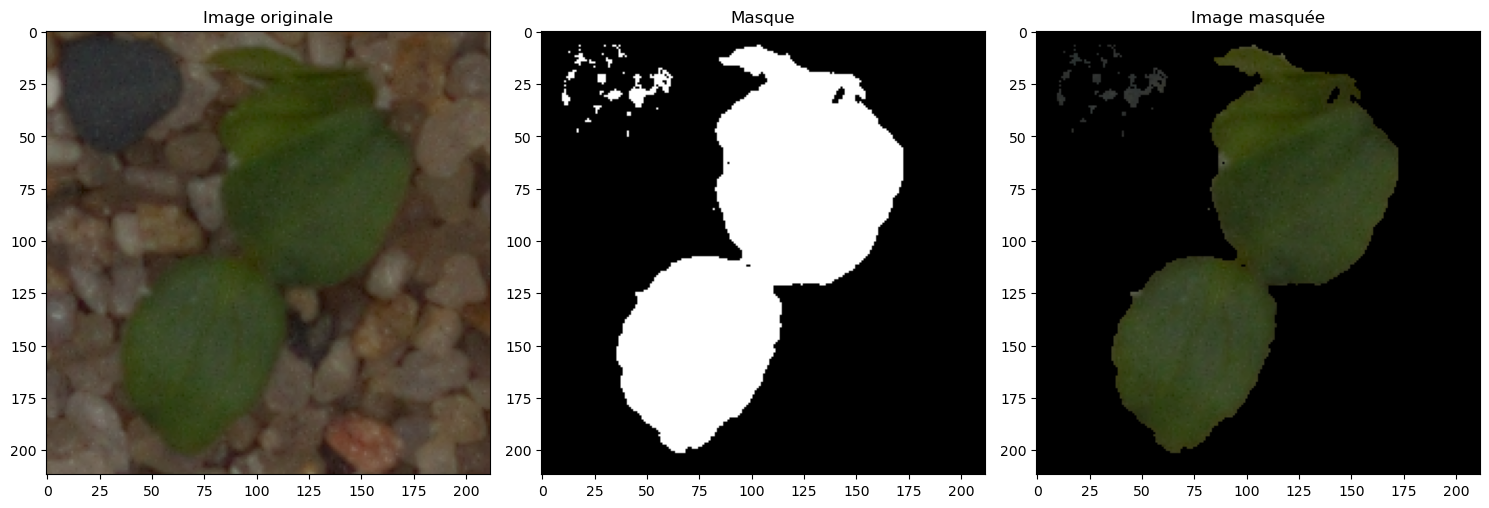

(460, 460, 3)


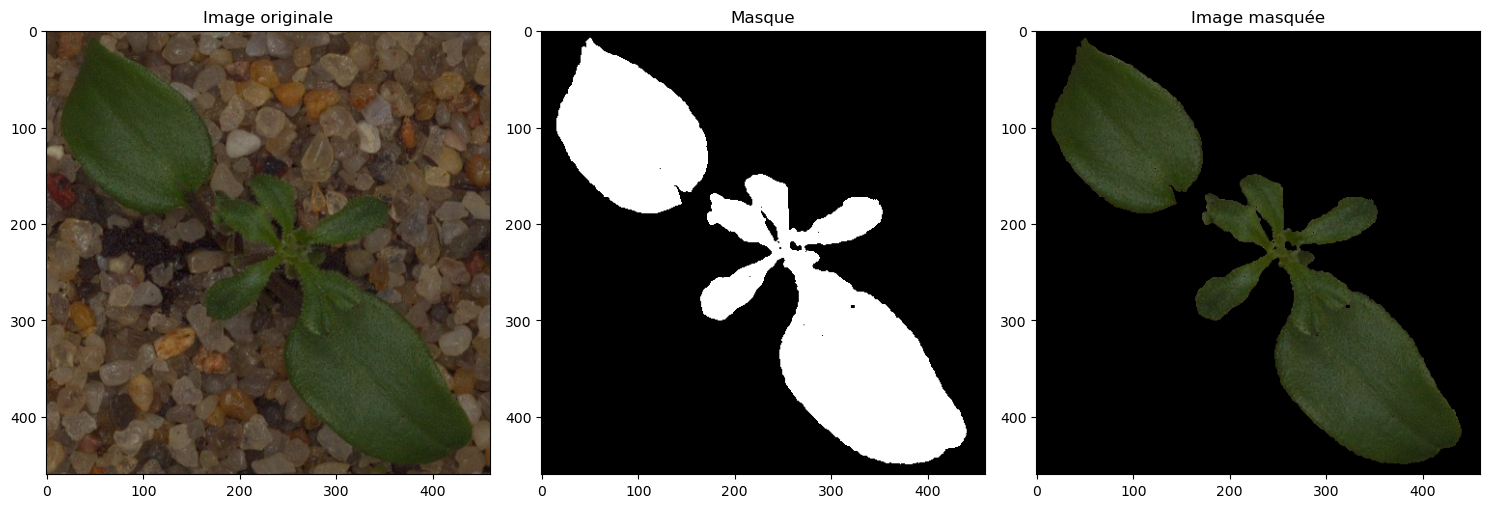

(363, 363, 3)


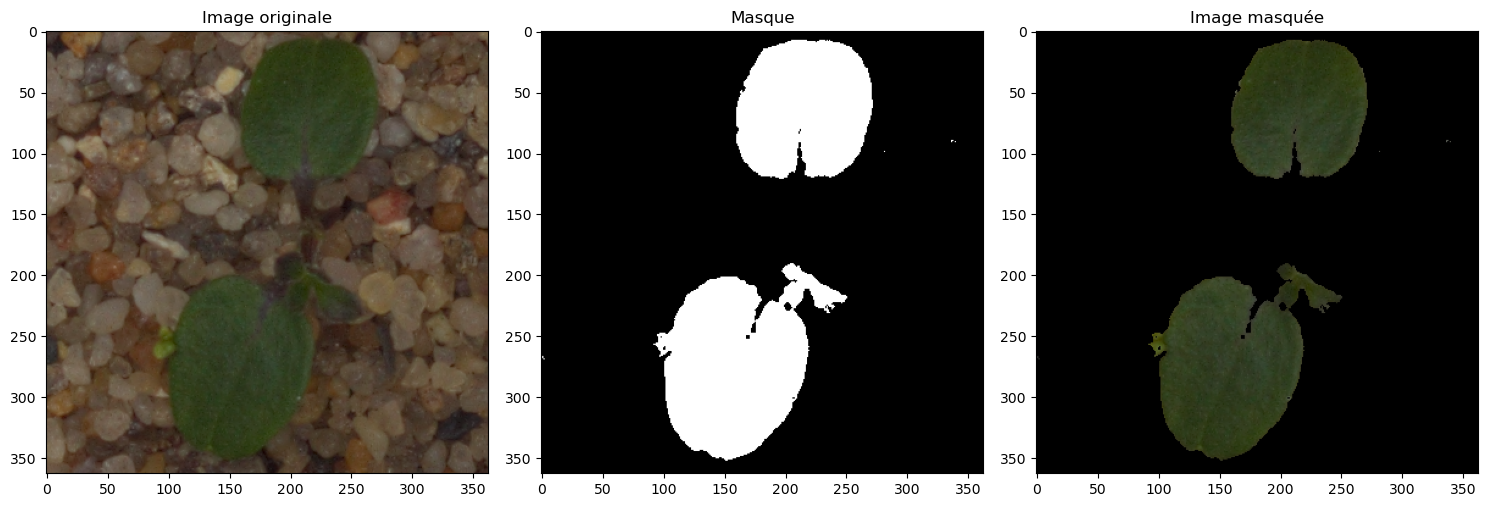

(184, 184, 3)


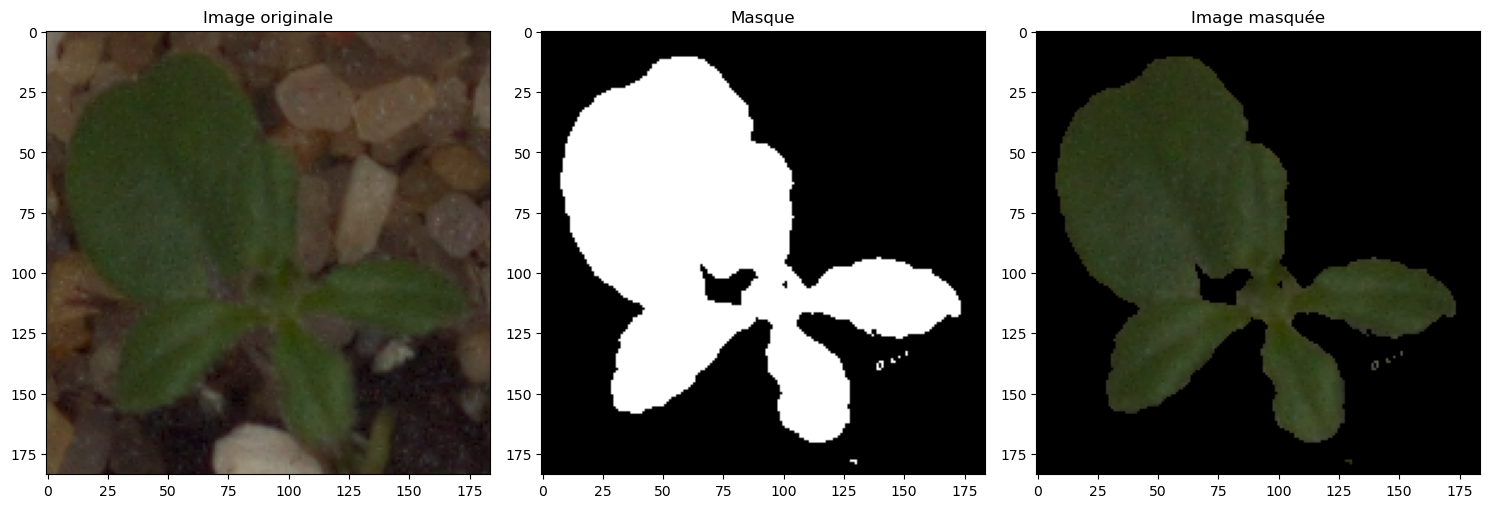

In [10]:
def create_green_mask(image_path, output_path, green_threshold=(90, 10, 90)):
    #importation de l'image
    img = plt.imread(image_path)
    
    #conversion du type png (0-1) en classique (0-255)
    if img.dtype == np.float32 or img.dtype == np.float64:
        img = (img * 255).astype(np.uint8)
        
    #isoler les pixels du filtre vert
    green_mask = (img[:,:,1] > img[:,:,0]) & (img[:,:,1] > img[:,:,2])
    
    # seuil pour vert
    green_mask = green_mask & (img[:,:,1] > green_threshold[1])
    
    # seuil pour rouge et jaune
    green_mask = green_mask & (img[:,:,0] < green_threshold[0]) & (img[:,:,2] < green_threshold[2])
    
    # application du masque + négatif
    masked_img = img.copy()
    if img.shape[2] == 3 : 
        masked_img[~green_mask] = [0, 0, 0]
    elif img.shape[2] == 4 :
        masked_img[~green_mask] = [0, 0, 0, 255]
    # sauvegarde du masque
    #plt.imsave(output_path + '_mask.png', green_mask, cmap='gray')
    
    # sauvegarde de l'image masquée
    #plt.imsave(output_path + '_result.png', masked_img)
    
    # affichage de l'image masquée du masque et de l'image originale
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.imshow(img)
    ax1.set_title('Image originale')
    ax2.imshow(green_mask, cmap='gray')
    ax2.set_title('Masque')
    ax3.imshow(masked_img)
    ax3.set_title('Image masquée')
    plt.tight_layout()
    plt.show()
    
    return green_mask, masked_img

#application
for i in range(0,10):
    mask, result = create_green_mask(df.chemin[i], 'output_image')

## 3. Standardisation des images

- On redimensionne les images aux mêmes dimensions.
- On applique un fond noir sur chaque image
- On sauvegarde les images modifiées dans un dossier 

In [4]:
import cv2

# Fonction pour importer une image 
def import_image(image_path):
    # Importation de l'image
    img = plt.imread(image_path)
    
    # Conversion du type png (0-1) en classique (0-255)
    if img.dtype == np.float32 or img.dtype == np.float64:
        img = (img * 255).astype(np.uint8)
    
    return img


# Fonction pour redimensionner une image
def resize_image(img, size=(224, 224)):
   
    img_resized = cv2.resize(img, size)

    return img_resized


# Fonction pour appliquer le masque vert
def create_green_mask(img, green_threshold=(90, 10, 90)):
    
    # Isoler les pixels du filtre vert
    green_mask = (img[:,:,1] > img[:,:,0]) & (img[:,:,1] > img[:,:,2])
    
    # Seuil pour vert
    green_mask = green_mask & (img[:,:,1] > green_threshold[1])
    
    # Seuil pour rouge et jaune
    green_mask = green_mask & (img[:,:,0] < green_threshold[0]) & (img[:,:,2] < green_threshold[2])
    
    # Application du masque + négatif
    masked_img = img.copy()
    if img.shape[2] == 3 : 
        masked_img[~green_mask] = [0, 0, 0]
    elif img.shape[2] == 4 :
        masked_img[~green_mask] = [0, 0, 0, 255]
    
    return green_mask, masked_img

# Fonction pour appliquer le process complet : Importation + Redimensionnement + Application du masque vert 
def process_images(image_paths, output_path, size=(224, 224), green_threshold=(90, 10, 90)):
    
    # Création du répertoire de sortie s'il n'existe pas
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    for i, image_path in enumerate(image_paths):
        print(f"Processing image {i+1}/{len(image_paths)}: {image_path}")
        
        # Étape 1: Importation de l'image
        img = import_image(image_path)
        
        # Étape 2: Redimensionnement de l'image
        img_resized = resize_image(img, size=size)
        
        if './semis' in image_path : 
        # Étape 3: Application du masque vert
            green_mask, masked_img = create_green_mask(img_resized, green_threshold=green_threshold)
        
        # Sauvegarde des résultats
        #plt.imsave(f"{output_path}/image_{i+1}_resized.png", img_resized)
        #plt.imsave(f"{output_path}/image_{i+1}_mask.png", green_mask, cmap='gray')
            plt.imsave(f"{output_path}/image_{i+1}_masked.png", masked_img)
        else : 
            plt.imsave(f"{output_path}/image_{i+1}_masked.png", img_resized)
        # Affichage des résultats
        #fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
        #ax1.imshow(img_resized)
        #ax1.set_title('Image redimensionnée')
        #ax2.imshow(green_mask, cmap='gray')
        #ax2.set_title('Masque')
        #ax3.imshow(masked_img)
        #ax3.set_title('Image masquée')
        #plt.tight_layout()
        #plt.show()


# Application

output_dir = "output_images"
image_paths = df['chemin'].tolist()
image_paths.remove('./plantdisease/Soybean___healthy/b32e4516-9cd7-4226-be52-26f413c97834___RS_HL 3512_final_masked.jpg')
process_images(image_paths, output_path=output_dir, size=(224, 224), green_threshold=(90, 10, 90))

Processing image 1/59844: ./semis/Cleavers/348.png
Processing image 2/59844: ./semis/Cleavers/176.png
Processing image 3/59844: ./semis/Cleavers/88.png
Processing image 4/59844: ./semis/Cleavers/162.png
Processing image 5/59844: ./semis/Cleavers/189.png
Processing image 6/59844: ./semis/Cleavers/77.png
Processing image 7/59844: ./semis/Cleavers/63.png
Processing image 8/59844: ./semis/Cleavers/228.png
Processing image 9/59844: ./semis/Cleavers/200.png
Processing image 10/59844: ./semis/Cleavers/214.png
Processing image 11/59844: ./semis/Cleavers/215.png
Processing image 12/59844: ./semis/Cleavers/201.png
Processing image 13/59844: ./semis/Cleavers/229.png
Processing image 14/59844: ./semis/Cleavers/62.png
Processing image 15/59844: ./semis/Cleavers/188.png
Processing image 16/59844: ./semis/Cleavers/76.png
Processing image 17/59844: ./semis/Cleavers/163.png
Processing image 18/59844: ./semis/Cleavers/177.png
Processing image 19/59844: ./semis/Cleavers/89.png
Processing image 20/59844: 

Processing image 164/59844: ./semis/Cleavers/137.png
Processing image 165/59844: ./semis/Cleavers/22.png
Processing image 166/59844: ./semis/Cleavers/36.png
Processing image 167/59844: ./semis/Cleavers/269.png
Processing image 168/59844: ./semis/Cleavers/255.png
Processing image 169/59844: ./semis/Cleavers/241.png
Processing image 170/59844: ./semis/Cleavers/296.png
Processing image 171/59844: ./semis/Cleavers/282.png
Processing image 172/59844: ./semis/Cleavers/283.png
Processing image 173/59844: ./semis/Cleavers/297.png
Processing image 174/59844: ./semis/Cleavers/240.png
Processing image 175/59844: ./semis/Cleavers/254.png
Processing image 176/59844: ./semis/Cleavers/268.png
Processing image 177/59844: ./semis/Cleavers/37.png
Processing image 178/59844: ./semis/Cleavers/23.png
Processing image 179/59844: ./semis/Cleavers/136.png
Processing image 180/59844: ./semis/Cleavers/122.png
Processing image 181/59844: ./semis/Cleavers/334.png
Processing image 182/59844: ./semis/Cleavers/320.p

KeyboardInterrupt: 